# Project 3

In [1]:
##Import modules
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder, get_geocoders
import pandas as pd
from arcgis.geometry import filters
import arcpy
from fc_to_csv import tableToCSV
import os
import matplotlib.pyplot as plt


#Set GIS with password
gis = GIS("http://slustl.maps.arcgis.com/home", "sspiegel_slu","Apples*200")


In [3]:
path = os.getcwd()

In [3]:
#Get URL of feature service
baseURL = "http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/1/query"
#build query
where = "STATE_NAME='Missouri'"
fields = "*"

query = "?where={}&outFields={}&returnGeometry=true&f=json".format(where, fields)

fsURL = baseURL + query

fs = arcpy.FeatureSet()
fs.load(fsURL)


In [4]:
print(fsURL)

http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/1/query?where=STATE_NAME='Missouri'&outFields=*&returnGeometry=true&f=json


In [13]:
arcpy.CopyFeatures_management(fs, "D:\Advanced_Class\jupyter_stuff\Project_3\states.gdb\MO_1")

<Result 'D:\\Advanced_Class\\jupyter_stuff\\Project_3\\states.gdb\\MO_1'>

In [5]:
county_search = gis.content.search('USA Tapestry Service for Counties',outside_org=True)

In [6]:
county_search

[<Item title:"2012 USA Tapestry Segmentation (Mature Support)" type:Map Image Layer owner:esri>,
 <Item title:"2014 USA Tapestry Segmentation" type:Map Image Layer owner:esri>,
 <Item title:"my map" type:Web Map owner:sdsmith456>,
 <Item title:"2017 USA Tapestry Segmentation Layer - Demo" type:Map Image Layer owner:esri_devlabs>,
 <Item title:"2015 USA Tapestry Segmentation" type:Map Image Layer owner:esri>,
 <Item title:"USA_Demographics_and_Boundaries_2016" type:Map Image Layer owner:patrickarlt7104>,
 <Item title:"Nueces County Unemployment Rate" type:Web Map owner:mcornelius>,
 <Item title:"2015 USA Tapestry Segmentation - Copy" type:Map Image Layer owner:lwalling00>,
 <Item title:"USA Tapestry" type:Map Image Layer owner:cmahlke_devloper>,
 <Item title:"USA Tapestry" type:Map Image Layer owner:stfeirer_ucanr>]

In [4]:
fc = r"D:\Advanced_Class\jupyter_stuff\Project_3\states.gdb\MO_1"

In [5]:
fc

'D:\\Advanced_Class\\jupyter_stuff\\Project_3\\states.gdb\\MO_1'

In [11]:
field_names = [f.name for f in arcpy.ListFields(fc)]

In [5]:
tableToCSV(input_tbl=fc,csv_filepath=os.path.join(path,'fc.csv'))

D:\Advanced_Class\jupyter_stuff\Project_3\fc.csv CREATED


In [6]:
csv_file = os.path.join(path,'fc.csv')


In [7]:
df = pd.read_csv(csv_file)

In [8]:
df

,OBJECTID,Shape,ID,NAME,STATE_NAME,ST_ABBREV,County_AREA,TSEGNUM,TSEGCODE,TSEGNAME,...,THHGRPL7,THHGRPL8,THHGRPL9,THHGRPL10,THHGRPL11,THHGRPL12,THHGRPL13,THHGRPL14,Shape_Length,Shape_Area
0,1,"(-10308264.687251106, 4893694.749264869)",29001,Adair County,Missouri,MO,569.508658,38,8F,Old and Newcomers,...,0,2178,0,718,414,552,0,2216,204149.339277,2.530557e+09
1,2,"(-10553313.106502375, 4863571.28260229)",29003,Andrew County,Missouri,MO,436.317612,26,6F,Heartland Communities,...,0,0,0,456,0,0,0,0,215730.130632,1.927070e+09
2,3,"(-10623346.467351057, 4928960.212424792)",29005,Atchison County,Missouri,MO,556.848560,24,6D,Prairie Living,...,0,0,0,0,0,324,0,0,222891.329535,2.491927e+09
3,4,"(-10223763.925447494, 4752637.076008475)",29007,Audrain County,Missouri,MO,696.737302,58,12C,Small Town Simplicity,...,0,537,0,0,0,2879,0,0,279993.455091,3.010309e+09
4,5,"(-10445002.351239916, 4398783.861268294)",29009,Barry County,Missouri,MO,790.957836,46,10A,Southern Satellites,...,272,0,688,5942,238,382,0,0,229804.943973,3.193721e+09
5,6,"(-10502671.393687485, 4509372.804490572)",29011,Barton County,Missouri,MO,596.747317,26,6F,Heartland Communities,...,0,0,0,327,0,261,0,0,202089.835494,2.460041e+09
6,7,"(-10501885.2019228, 4615880.530282983)",29013,Bates County,Missouri,MO,851.416977,24,6D,Prairie Living,...,0,0,0,1588,0,1468,0,0,295485.080653,3.581999e+09
7,8,"(-10384768.252404539, 4621213.766597365)",29015,Benton County,Missouri,MO,752.569499,25,6E,Rural Resort Dwellers,...,0,0,1059,977,0,530,0,0,238567.131057,3.169391e+09
8,9,"(-10021631.09142386, 4484174.531569428)",29017,Bollinger County,Missouri,MO,621.137049,47,10B,Rooted Rural,...,0,0,0,4169,0,817,0,0,238586.340424,2.548425e+09
9,10,"(-10275863.002681859, 4720395.4505066415)",29019,Boone County,Missouri,MO,691.121917,35,8C,Bright Young Professionals,...,1844,11644,1499,0,10007,1376,0,11807,286833.869574,2.967215e+09


In [7]:
print(df.loc[:,"TLIFENAME"].mode())

0    Cozy Country Living
dtype: object


['Middle Ground' 'Cozy Country Living' 'Hometown' 'Rustic Outposts'
 'Family Landscapes' 'GenXurban' 'Senior Styles' 'Scholars and Patriots']


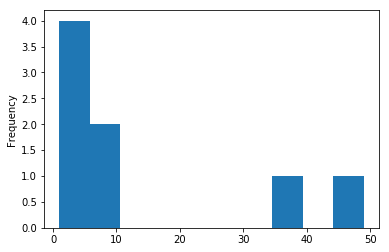

In [8]:


# path = os.getcwd()




TLIFENAME=df.TLIFENAME.unique()

print(TLIFENAME)

tlife_dic = {}


x = df.loc[df['TLIFENAME'] == 'Middle Ground']

tl_name = df.TLIFENAME.value_counts()

tl_name.plot.hist()

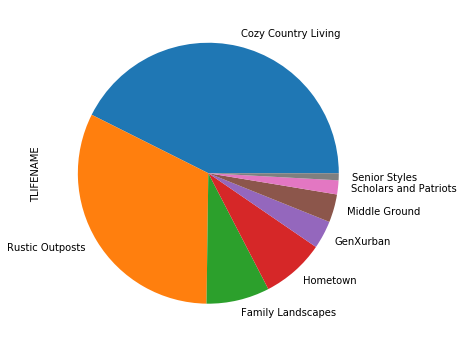

In [9]:
tl_name.plot.pie(figsize=(6, 6))

In [8]:
TSEGNAME=df.TSEGNAME.unique()

print(TSEGNAME)

#tlife_dic = {}


#x_TSEGNAME = df.loc[df['TLIFENAME'] == 'Middle Ground']

#tl_name = df.TLIFENAME.value_counts()

#tl_name.plot.hist()

['Old and Newcomers' 'Heartland Communities' 'Prairie Living'
 'Small Town Simplicity' 'Southern Satellites' 'Rural Resort Dwellers'
 'Rooted Rural' 'Bright Young Professionals' 'Traditional Living'
 'Salt of the Earth' 'Middleburg' 'Green Acres' 'Rural Bypasses'
 'Rustbelt Traditions' 'Senior Escapes' 'Midlife Constants'
 'College Towns' 'Soccer Moms' 'Family Foundations' 'Emerald City']


In [9]:
print(df.loc[:,"TSEGNAME"].mode())

0    Rooted Rural
dtype: object


In [10]:
ts_name = df.TSEGNAME.value_counts()

In [11]:
ts_name

Rooted Rural                  27
Heartland Communities         16
Prairie Living                16
Salt of the Earth              9
Southern Satellites            8
Middleburg                     8
Small Town Simplicity          6
Green Acres                    4
Rural Resort Dwellers          4
Rural Bypasses                 2
Traditional Living             2
College Towns                  2
Rustbelt Traditions            2
Old and Newcomers              2
Midlife Constants              2
Senior Escapes                 1
Emerald City                   1
Family Foundations             1
Bright Young Professionals     1
Soccer Moms                    1
Name: TSEGNAME, dtype: int64

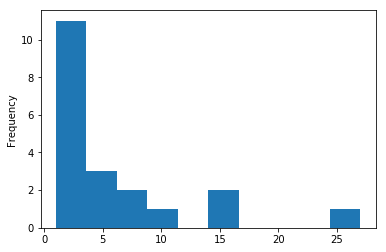

In [12]:
ts_name.plot.hist()

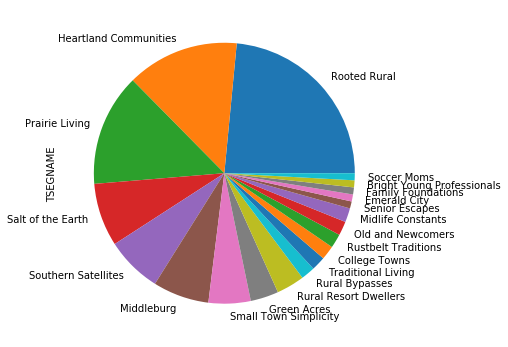

In [13]:
ts_name.plot.pie(figsize=(6, 6))